In [1]:
import matplotlib.pyplot as plt

def grid_plot(elements, width, height, make_plot):
    if (width * height < len(elements)): raise ValueError("Insufficient room in the grid")
    _, axes = plt.subplots(height, width, figsize=(4 * width, 4 * height))
    for index, element in enumerate(elements):
        ax=axes[index // width][index % width]
        ax.set_xticks([])
        ax.set_yticks([])
        make_plot(ax, element, index)
    return axes


In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]


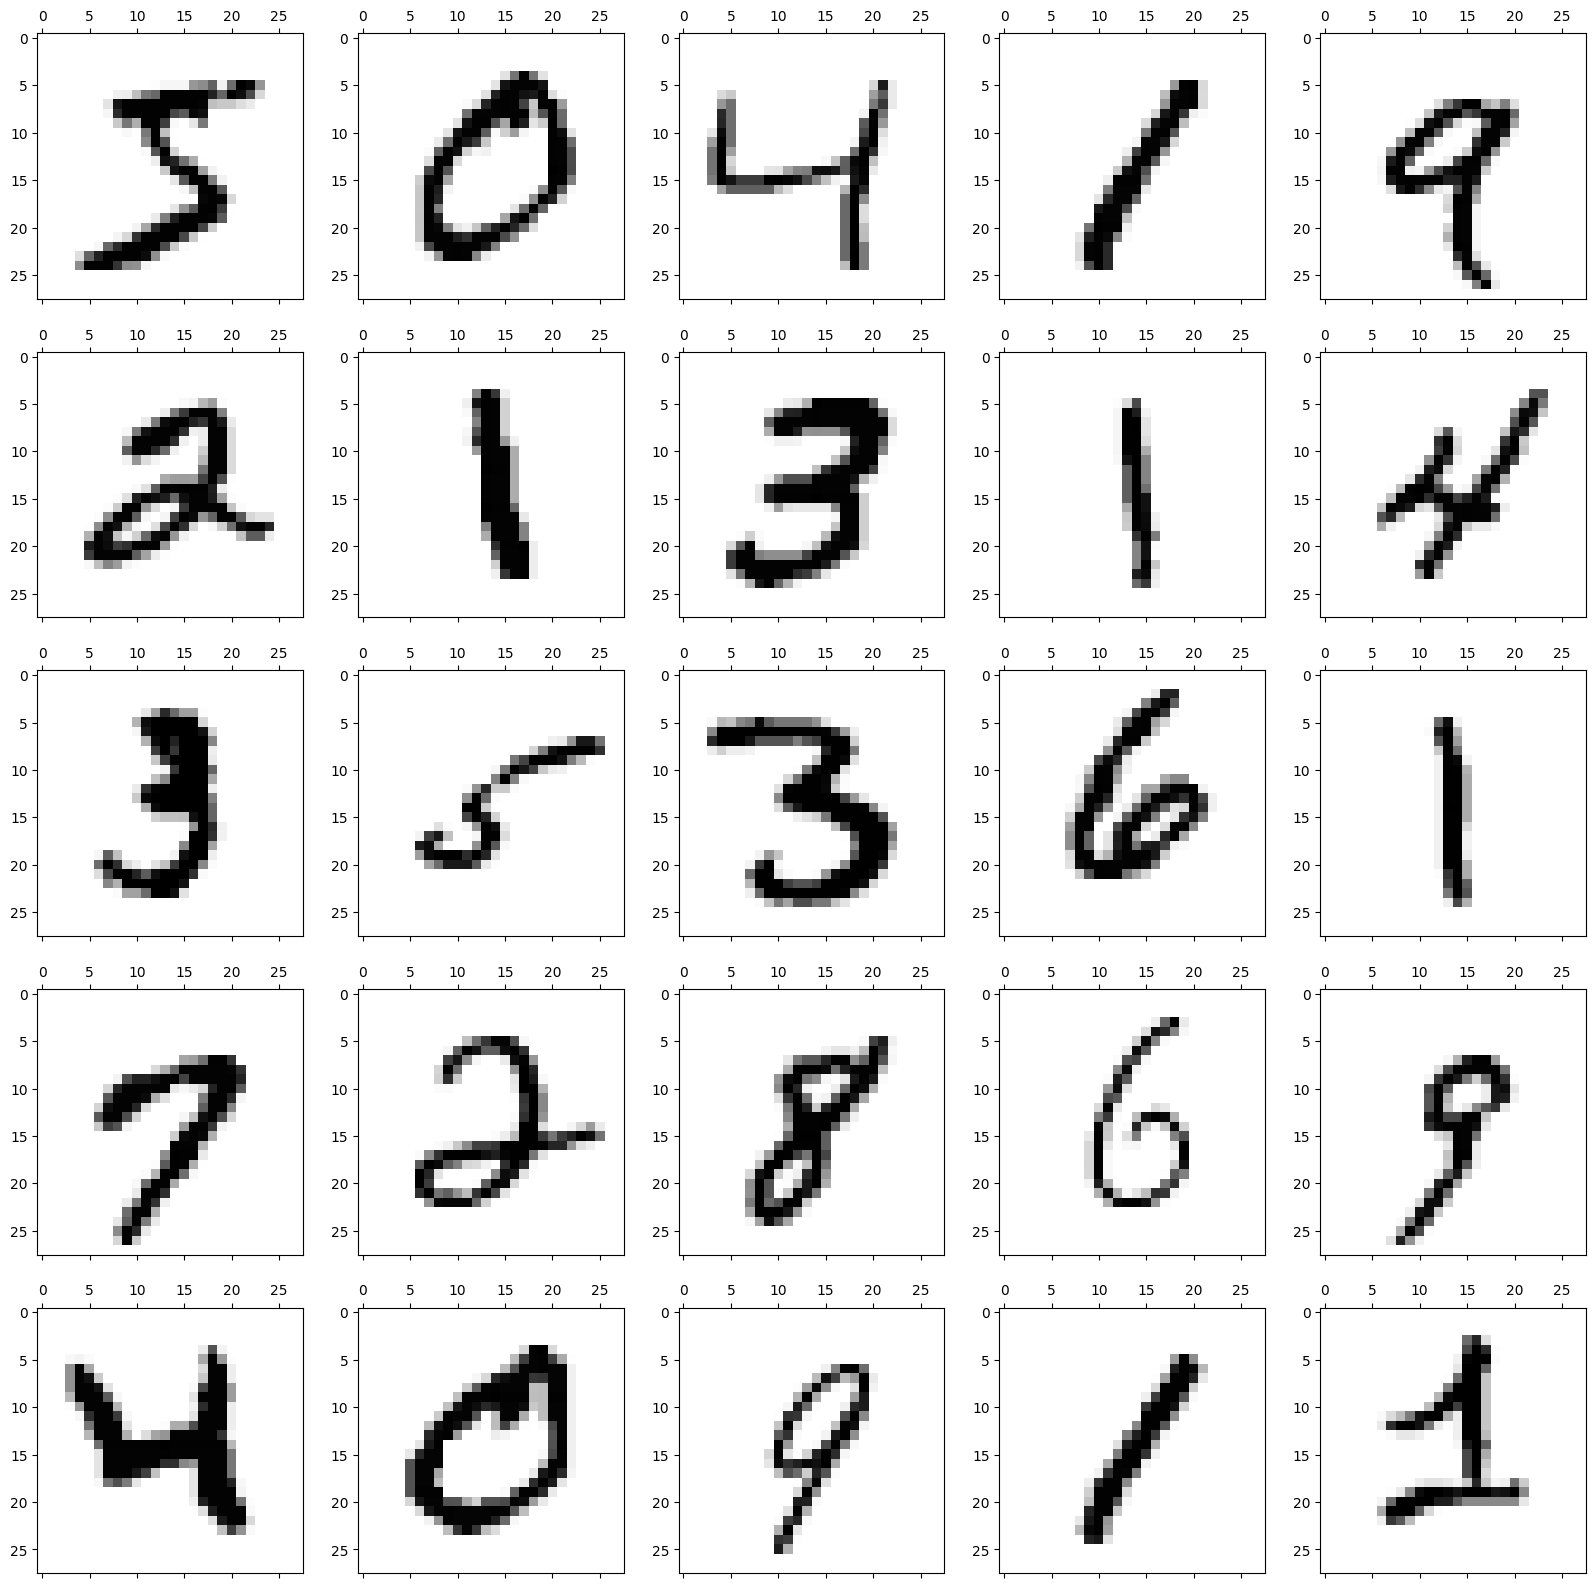

In [3]:
def plot_pc(ax, num, _):
    num_grid = num.reshape(28, -1)

    ax.matshow(num_grid, cmap='Greys')

axes = grid_plot(X_train[0:5*5], 5, 5, plot_pc)

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=504)
kmeans.fit(X_train)

KMeans(n_clusters=10, random_state=504)

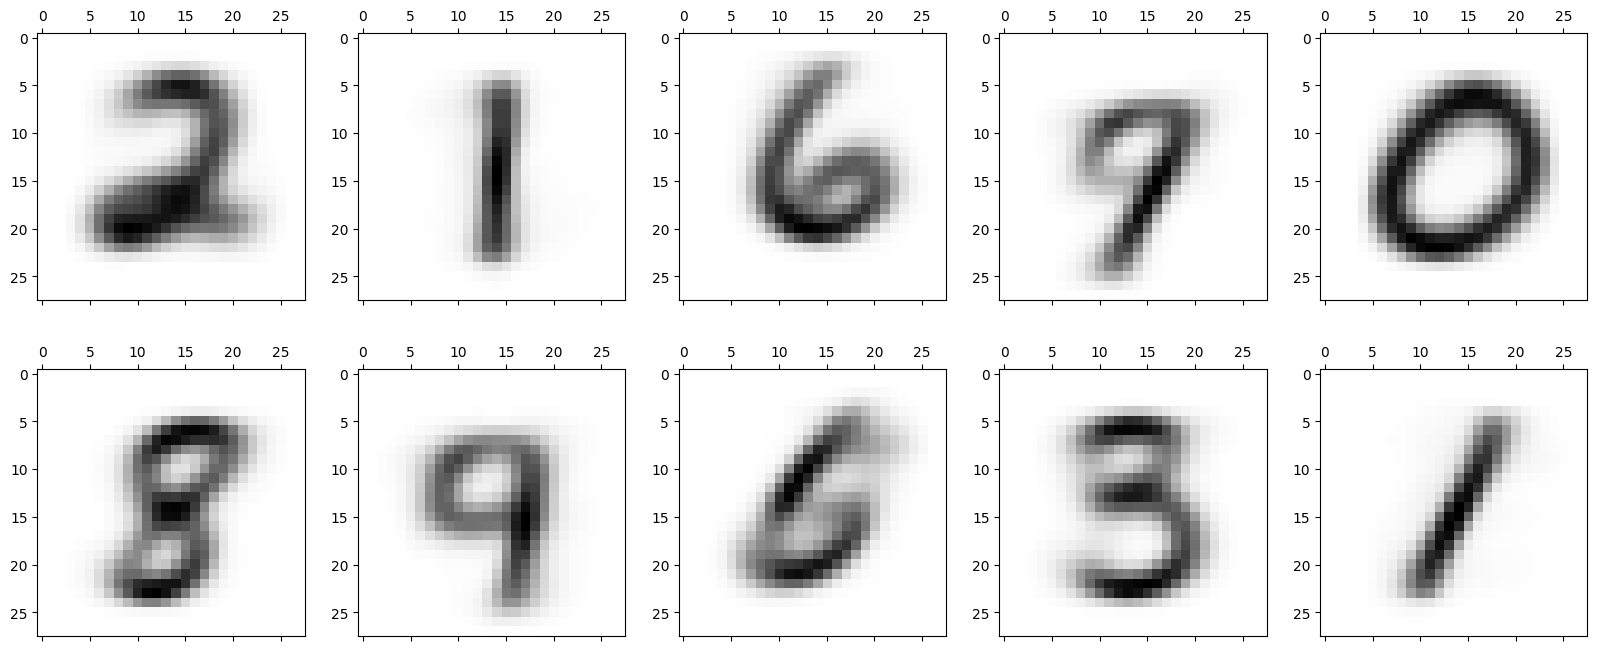

In [5]:
axes = grid_plot(kmeans.cluster_centers_, 5, 2, plot_pc)


In [6]:
from itertools import groupby

cluster_x_y = zip(kmeans.predict(X_train), y_train)
cluster_x_y = sorted(cluster_x_y, key = lambda cv: cv[0])
groups = groupby(cluster_x_y, key = lambda cv: cv[0])

def bag(vals):
  vals = sorted(vals)
  gs = groupby(vals)
  return [(val, len([*group])) for val, group in gs]

for cluster, group in groups:
  stats = bag([y for __, y in group])
  print(cluster, ': ', stats)


0 :  [('0', 8), ('1', 9), ('2', 4167), ('3', 175), ('4', 29), ('5', 4), ('6', 48), ('7', 41), ('8', 45), ('9', 16)]
1 :  [('0', 2), ('1', 3653), ('2', 381), ('3', 409), ('4', 155), ('5', 153), ('6', 182), ('7', 335), ('8', 314), ('9', 254)]
2 :  [('0', 133), ('1', 5), ('2', 131), ('3', 29), ('4', 142), ('5', 57), ('6', 3701), ('7', 4), ('8', 44), ('9', 11)]
3 :  [('0', 5), ('1', 10), ('2', 67), ('3', 35), ('4', 1891), ('5', 191), ('6', 3), ('7', 3765), ('8', 169), ('9', 2448)]
4 :  [('0', 4300), ('2', 44), ('3', 22), ('4', 8), ('5', 55), ('6', 51), ('7', 20), ('8', 29), ('9', 41)]
5 :  [('0', 70), ('1', 8), ('2', 170), ('3', 962), ('4', 15), ('5', 1015), ('6', 15), ('7', 15), ('8', 3513), ('9', 69)]
6 :  [('0', 40), ('1', 6), ('2', 191), ('3', 175), ('4', 3181), ('5', 375), ('6', 55), ('7', 1812), ('8', 178), ('9', 2917)]
7 :  [('0', 1128), ('1', 6), ('2', 200), ('3', 412), ('4', 206), ('5', 1481), ('6', 1786), ('7', 7), ('8', 215), ('9', 22)]
8 :  [('0', 235), ('1', 6), ('2', 277), ('

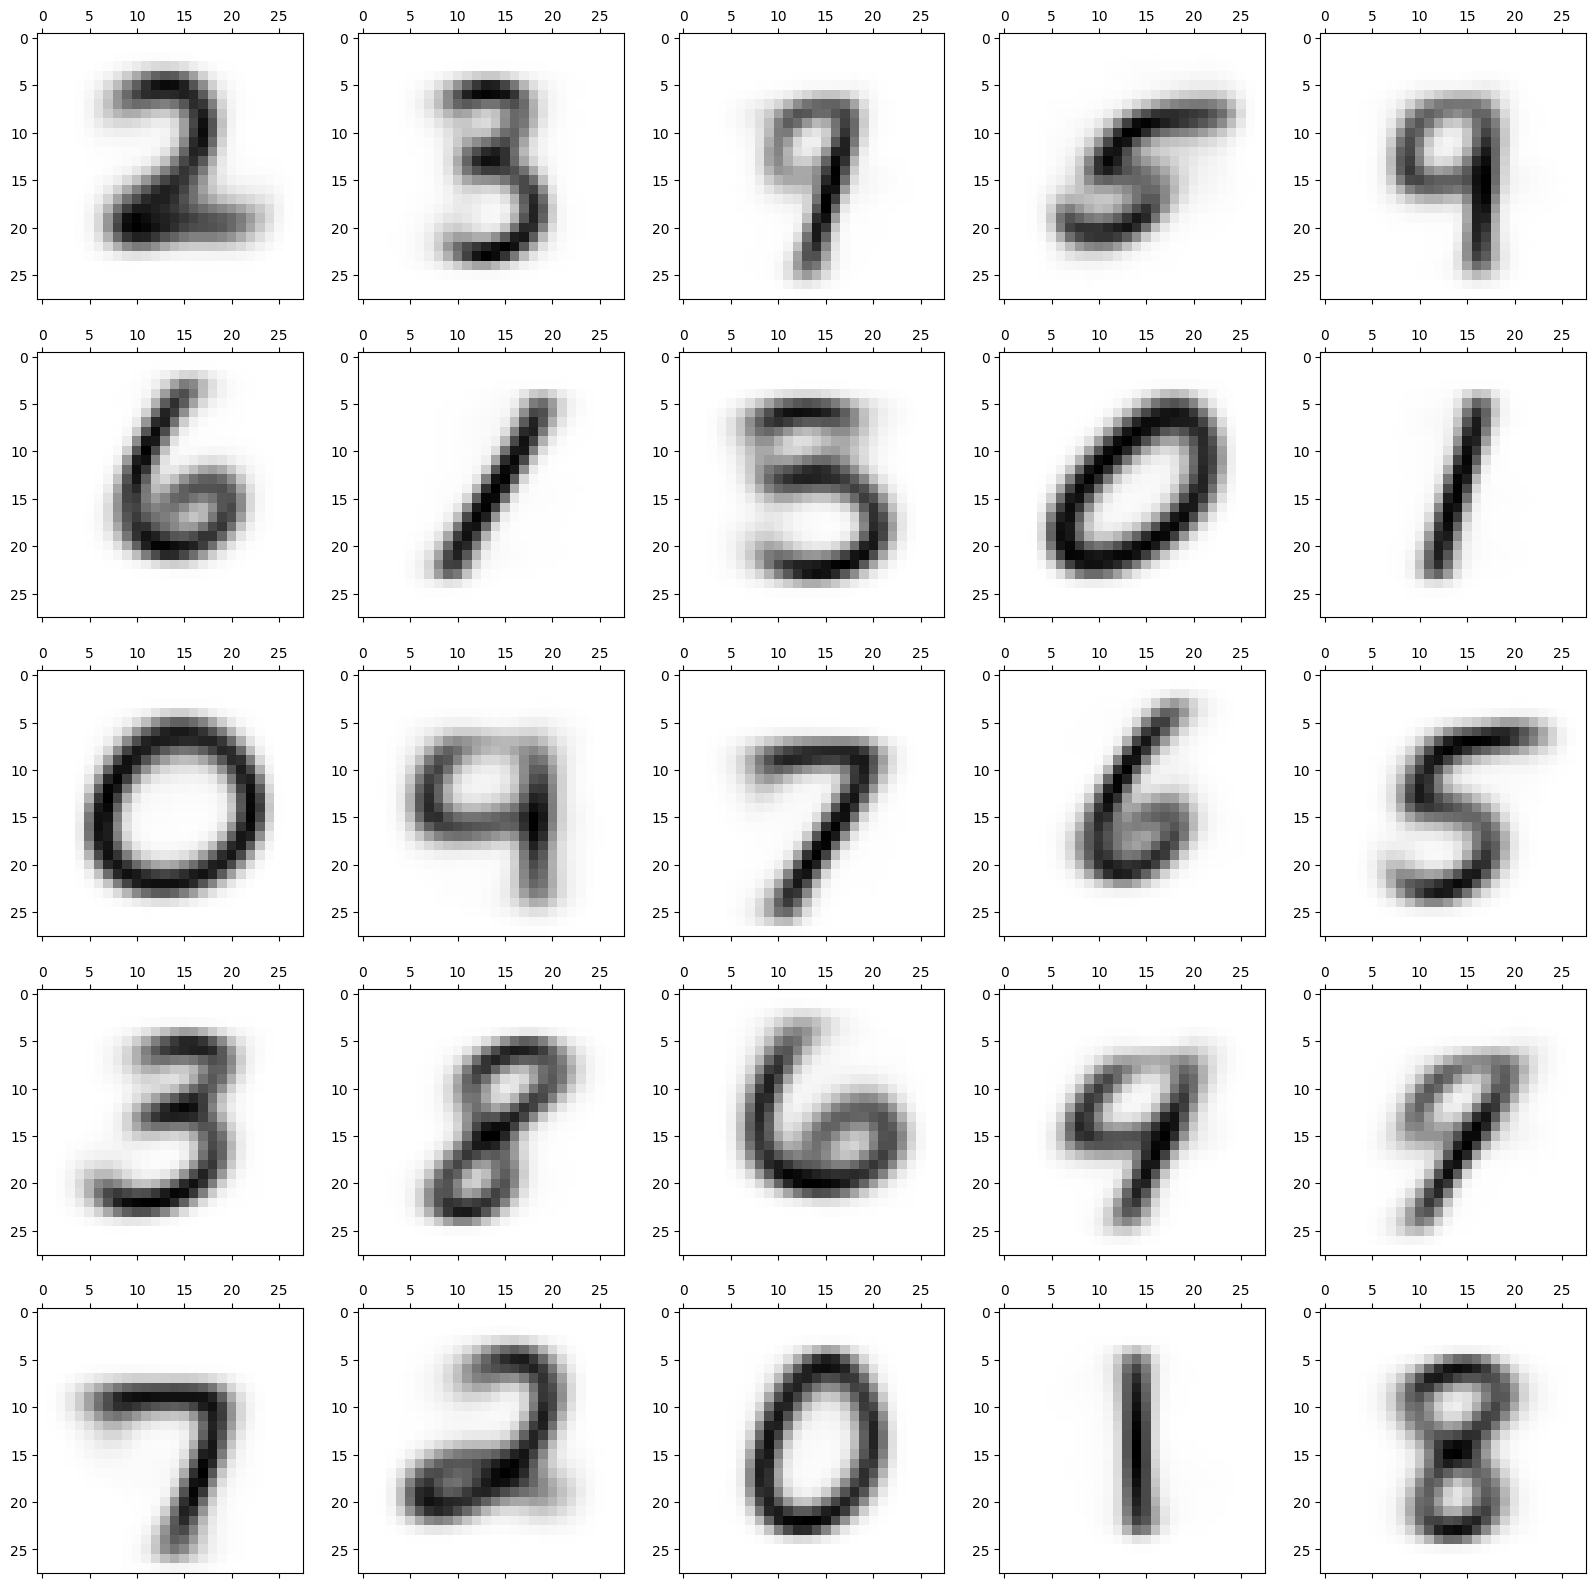

In [7]:
kmeans = KMeans(n_clusters=25, random_state=504)
kmeans.fit(X_train)
axes = grid_plot(kmeans.cluster_centers_, 5, 5, plot_pc)

In [8]:
cluster_x_y = zip(kmeans.predict(X_train), y_train)
cluster_x_y = sorted(cluster_x_y, key = lambda cv: cv[0])
groups = groupby(cluster_x_y, key = lambda cv: cv[0])

def bag(vals):
  vals = sorted(vals)
  gs = groupby(vals)
  return [(val, len([*group])) for val, group in gs]

for cluster, group in groups:
  stats = bag([y for __, y in group])
  print(cluster, ': ', stats)


0 :  [('0', 1), ('1', 19), ('2', 2460), ('3', 38), ('4', 1), ('5', 2), ('6', 1), ('7', 13), ('8', 14)]
1 :  [('0', 52), ('1', 32), ('2', 122), ('3', 1861), ('4', 3), ('5', 472), ('6', 35), ('7', 6), ('8', 482), ('9', 58)]
2 :  [('0', 6), ('1', 21), ('2', 49), ('3', 83), ('4', 624), ('5', 40), ('6', 7), ('7', 1092), ('8', 82), ('9', 1290)]
3 :  [('0', 170), ('1', 12), ('2', 159), ('3', 100), ('4', 73), ('5', 1403), ('6', 91), ('7', 46), ('8', 196), ('9', 14)]
4 :  [('0', 1), ('1', 3), ('2', 51), ('3', 62), ('4', 1317), ('5', 84), ('6', 4), ('7', 200), ('8', 48), ('9', 1568)]
5 :  [('0', 28), ('1', 4), ('2', 11), ('3', 12), ('4', 29), ('5', 44), ('6', 2255), ('8', 11), ('9', 2)]
6 :  [('1', 1767), ('2', 81), ('3', 11), ('4', 38), ('5', 10), ('6', 13), ('7', 67), ('8', 55), ('9', 13)]
7 :  [('0', 41), ('2', 18), ('3', 1332), ('5', 984), ('6', 13), ('7', 3), ('8', 415), ('9', 30)]
8 :  [('0', 1769), ('2', 31), ('3', 6), ('4', 2), ('5', 14), ('6', 39), ('7', 5), ('8', 13), ('9', 3)]
9 :  [(